# Building model using keras layers

**Importing libraries**

In [0]:
import numpy as np
from keras.datasets import cifar10
import cv2
import keras as k
from keras import models
from matplotlib import pyplot as p
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras import optimizers
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization, Input,Lambda
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D

**Experiment 1**

In [0]:
  modelAlex = Sequential()
  modelAlex.add(Conv2D(96, (11, 11), input_shape=(32,32,3), strides=(4,4), padding='same', activation='relu'))
  modelAlex.add(Conv2D(96, (11, 11), padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #model1.add(BatchNormalization())
  
  
  
  modelAlex.add(Conv2D(256, (5, 5),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  #model1.add(BatchNormalization())
  
  
  modelAlex.add(Conv2D(384, (3, 3),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
  #model1.add(BatchNormalization())
  #model1.add(Dropout(0.30))
  
  modelAlex.add(Conv2D(384, (3, 3),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
  
  
  modelAlex.add(Conv2D(256, (3, 3), padding='same', activation='relu'))  
  modelAlex.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
 
  
  modelAlex.add(Flatten())
  
  modelAlex.add(Dense(4096, activation='relu'))
  modelAlex.add(Dense(4096, activation='relu'))
 
 
  modelAlex.add(Dense(200, activation='softmax'))
  
  opt = optimizers.Adamax(lr = 0.0001, beta_1=0.9,beta_2=0.999,epsilon = None, decay=0.0)
  #opt = optimizers.Adam(beta_1=.9,beta_2=.999,lr = 0.0001)
  modelAlex.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:

history = modelAlex.fit(X_train, train_labels, epochs=5, batch_size=32, validation_data=(X_test,test_labels))
score = modelAlex.evaluate(X_test,test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 100000 samples, validate on 10000 samples
Epoch 1/5
100000/100000 [==============================] - 152s 2ms/step - loss: 4.6120 - acc: 0.0504 - val_loss: 4.5991 - val_acc: 0.0542
Epoch 2/5
100000/100000 [==============================] - 151s 2ms/step - loss: 4.5530 - acc: 0.0566 - val_loss: 4.5635 - val_acc: 0.0568
Epoch 3/5
100000/100000 [==============================] - 151s 2ms/step - loss: 4.4994 - acc: 0.0634 - val_loss: 4.5254 - val_acc: 0.0650
Epoch 4/5
100000/100000 [==============================] - 151s 2ms/step - loss: 4.4435 - acc: 0.0679 - val_loss: 4.4985 - val_acc: 0.0664
Epoch 5/5
10000/10000 [==============================] - 3s 292us/step
Test loss: 4.460063462066651
Test accuracy: 0.07


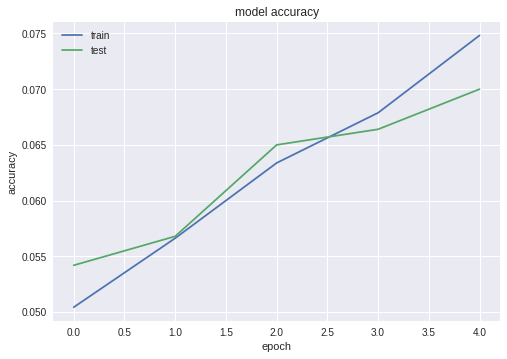

In [0]:
from matplotlib import pyplot as plt
# summarizescore history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

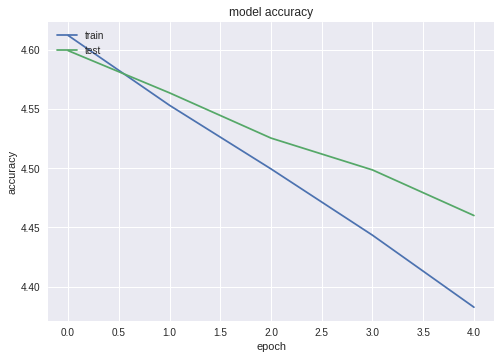

In [0]:
# summarizescore history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Conclusion**: The validation accuracy and training accuracy looks similar.

**Experiment 2: Tryig different optimizer**

In [0]:
  modelAlex = Sequential()
  modelAlex.add(Conv2D(96, (11, 11), input_shape=(32,32,3), strides=(4,4), padding='same', activation='relu'))
  modelAlex.add(Conv2D(96, (11, 11), padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #model1.add(BatchNormalization())
  
  
  
  modelAlex.add(Conv2D(256, (5, 5),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  #model1.add(BatchNormalization())
  
  
  modelAlex.add(Conv2D(384, (3, 3),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
  #model1.add(BatchNormalization())
  #model1.add(Dropout(0.30))
  
  modelAlex.add(Conv2D(384, (3, 3),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
  
  
  modelAlex.add(Conv2D(256, (3, 3), padding='same', activation='relu'))  
  modelAlex.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
 
  
  modelAlex.add(Flatten())
  
  modelAlex.add(Dense(4096, activation='relu'))
  modelAlex.add(Dense(4096, activation='relu'))
 
 
  modelAlex.add(Dense(200, activation='softmax'))
  
  #opt = optimizers.Adamax(lr = 0.001, beta_1=0.9,beta_2=0.999,epsilon = None, decay=0.0)
  opt = optimizers.Adagrad(lr=0.0001, epsilon=1e-6)
  modelAlex.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:

history = modelAlex.fit(X_train, train_labels, epochs=10, batch_size=32, validation_data=(X_test,test_labels))
score = modelAlex.evaluate(X_test,test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 100000 samples, validate on 10000 samples
Epoch 1/10
100000/100000 [==============================] - 145s 1ms/step - loss: 5.1512 - acc: 0.0117 - val_loss: 5.0767 - val_acc: 0.0152
Epoch 2/10
100000/100000 [==============================] - 142s 1ms/step - loss: 5.0726 - acc: 0.0164 - val_loss: 5.0660 - val_acc: 0.0170
Epoch 3/10
100000/100000 [==============================] - 141s 1ms/step - loss: 5.0644 - acc: 0.0166 - val_loss: 5.0599 - val_acc: 0.0165
Epoch 4/10
100000/100000 [==============================] - 143s 1ms/step - loss: 5.0596 - acc: 0.0175 - val_loss: 5.0571 - val_acc: 0.0171
Epoch 5/10
100000/100000 [==============================] - 146s 1ms/step - loss: 5.0561 - acc: 0.0177 - val_loss: 5.0539 - val_acc: 0.0173
Epoch 6/10
100000/100000 [==============================] - 146s 1ms/step - loss: 5.0533 - acc: 0.0179 - val_loss: 5.0536 - val_acc: 0.0171
Epoch 7/10
100000/100000 [==============================] - 147s 1ms/step - loss: 5.0511 - acc: 0.0180 - val_

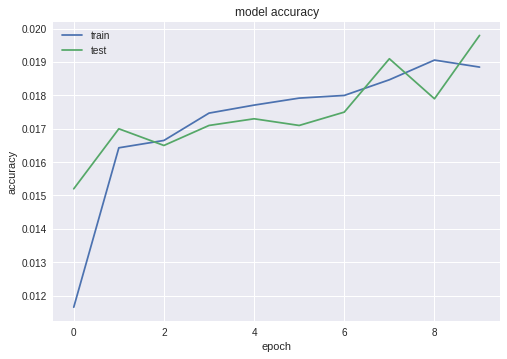

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

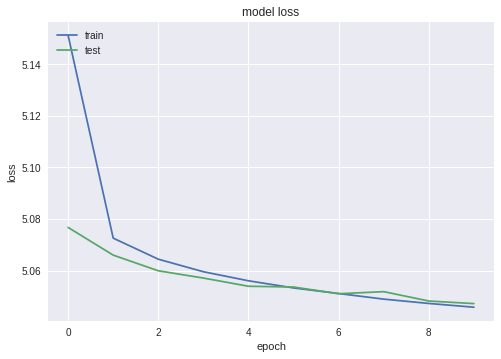

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Experiment 3: experiment 2 didnot result in good performance with adagrad so trying Adam

In [0]:
  modelAlex = Sequential()
  modelAlex.add(Conv2D(96, (11, 11), input_shape=(32,32,3), strides=(4,4), padding='same', activation='relu'))
  modelAlex.add(Conv2D(96, (11, 11), padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #model1.add(BatchNormalization())
  
  
  
  modelAlex.add(Conv2D(256, (5, 5),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  #model1.add(BatchNormalization())
  
  
  modelAlex.add(Conv2D(384, (3, 3),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
  #model1.add(BatchNormalization())
  #model1.add(Dropout(0.30))
  
  modelAlex.add(Conv2D(384, (3, 3),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
  
  
  modelAlex.add(Conv2D(256, (3, 3), padding='same', activation='relu'))  
  modelAlex.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
 
  
  modelAlex.add(Flatten())
  
  modelAlex.add(Dense(4096, activation='relu'))
  modelAlex.add(Dense(4096, activation='relu'))
 
 
  modelAlex.add(Dense(200, activation='softmax'))
  
  #opt = optimizers.Adamax(lr = 0.001, beta_1=0.9,beta_2=0.999,epsilon = None, decay=0.0)
  opt = optimizers.Adam(beta_1=.9,beta_2=.999,lr = 0.0001)
  modelAlex.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:

history = modelAlex.fit(X_train, train_labels, epochs=6, batch_size=64, validation_data=(X_test,test_labels))
score = modelAlex.evaluate(X_test,test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 100000 samples, validate on 10000 samples
Epoch 1/6
100000/100000 [==============================] - 102s 1ms/step - loss: 4.8916 - acc: 0.0272 - val_loss: 4.8174 - val_acc: 0.0362
Epoch 2/6
100000/100000 [==============================] - 104s 1ms/step - loss: 4.6976 - acc: 0.0433 - val_loss: 4.6096 - val_acc: 0.0536
Epoch 3/6
100000/100000 [==============================] - 102s 1ms/step - loss: 4.5285 - acc: 0.0603 - val_loss: 4.5119 - val_acc: 0.0656
Epoch 4/6
100000/100000 [==============================] - 102s 1ms/step - loss: 4.4111 - acc: 0.0734 - val_loss: 4.4608 - val_acc: 0.0722
Epoch 5/6
100000/100000 [==============================] - 103s 1ms/step - loss: 4.2816 - acc: 0.0888 - val_loss: 4.4140 - val_acc: 0.0822
Epoch 6/6
10000/10000 [==============================] - 3s 329us/step
Test loss: 4.41115400390625
Test accuracy: 0.0879


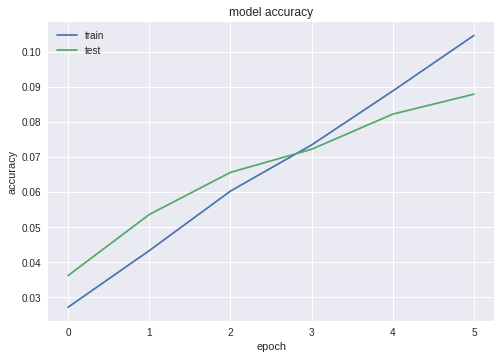

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

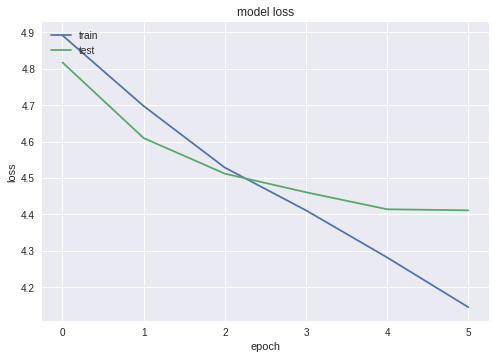

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Conclusion: Accuracy improved 

Experiment 4 : Taking Adam as optimizer as the accuracy improved in experiment 3 so decreasing batch size and increasing epochs.

In [0]:
  modelAlex = Sequential()
  modelAlex.add(Conv2D(96, (11, 11), input_shape=(32,32,3), strides=(4,4), padding='same', activation='relu'))
  modelAlex.add(Conv2D(96, (11, 11), padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #model1.add(BatchNormalization())
  
  
  
  modelAlex.add(Conv2D(256, (5, 5),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  #model1.add(BatchNormalization())
  
  
  modelAlex.add(Conv2D(384, (3, 3),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
  #model1.add(BatchNormalization())
  #model1.add(Dropout(0.30))
  
  modelAlex.add(Conv2D(384, (3, 3),padding='same', activation='relu'))
  modelAlex.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
  
  
  modelAlex.add(Conv2D(256, (3, 3), padding='same', activation='relu'))  
  modelAlex.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
 
  
  modelAlex.add(Flatten())
  
  modelAlex.add(Dense(4096, activation='relu'))
  modelAlex.add(Dense(4096, activation='relu'))
 
 
  modelAlex.add(Dense(200, activation='softmax'))
  
  #opt = optimizers.Adamax(lr = 0.001, beta_1=0.9,beta_2=0.999,epsilon = None, decay=0.0)
  opt = optimizers.Adam(beta_1=.9,beta_2=.999,lr = 0.0001)
  modelAlex.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:

history = modelAlex.fit(X_train, train_labels, epochs=8, batch_size=32, validation_data=(X_test,test_labels))
score = modelAlex.evaluate(X_test,test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 100000 samples, validate on 10000 samples
Epoch 1/8
100000/100000 [==============================] - 189s 2ms/step - loss: 5.0962 - acc: 0.0138 - val_loss: 4.9653 - val_acc: 0.0213
Epoch 2/8
100000/100000 [==============================] - 187s 2ms/step - loss: 4.9113 - acc: 0.0263 - val_loss: 4.8507 - val_acc: 0.0362
Epoch 3/8
100000/100000 [==============================] - 187s 2ms/step - loss: 4.6926 - acc: 0.0468 - val_loss: 4.6001 - val_acc: 0.0537
Epoch 4/8
100000/100000 [==============================] - 188s 2ms/step - loss: 4.5138 - acc: 0.0642 - val_loss: 4.5103 - val_acc: 0.0686
Epoch 5/8
100000/100000 [==============================] - 184s 2ms/step - loss: 4.3967 - acc: 0.0774 - val_loss: 4.4590 - val_acc: 0.0732
Epoch 6/8
100000/100000 [==============================] - 184s 2ms/step - loss: 4.2742 - acc: 0.0917 - val_loss: 4.3793 - val_acc: 0.0872
Epoch 7/8
100000/100000 [==============================] - 184s 2ms/step - loss: 4.1263 - acc: 0.1092 - val_loss: 4

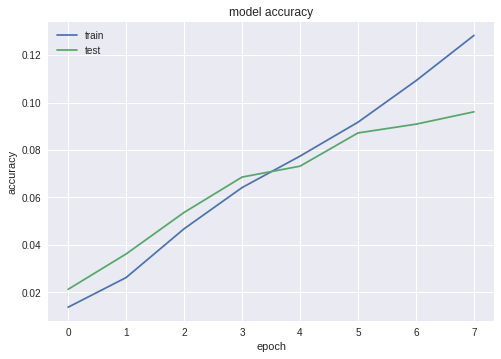

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

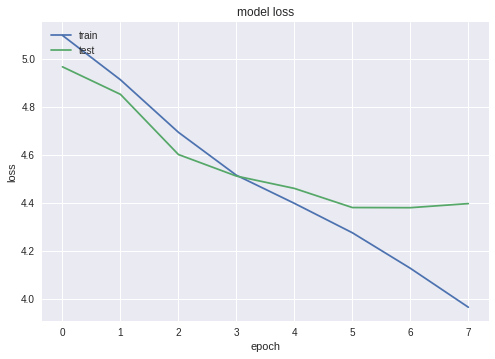

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Conclusion: Experiment 4 is the best the accuracy is the best